Import Library Yang Dibutuhkan

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Baca File Dataset

In [142]:
data = pd.read_csv('https://raw.githubusercontent.com/Aerysh/Pembelajaran_Mesin/main/kendaraan_train.csv')
data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# Eksplorasi Data

In [143]:
data.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

Ubah Value di Sebuah Kolom Jika Dibutuhkan

In [144]:
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace(['Tidak'], 0)
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace(['Pernah'], 1)
data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,0.0,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,1.0,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,0.0,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,0.0,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,0.0,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,0.0,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,0.0,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,0.0,30503.0,124.0,270.0,0


Memilih Kolom Yang Dibutuhkan

In [145]:
selColumn = ['Umur', 'Lama_Berlangganan']
newData = data[selColumn]
newData

,Umur,Lama_Berlangganan
0,30.0,97.0
1,48.0,158.0
2,21.0,119.0
3,58.0,63.0
4,50.0,194.0
...,...,...
285826,23.0,217.0
285827,21.0,50.0
285828,23.0,226.0
285829,68.0,270.0


# Preprocessing Data

Cek Banyak Data Duplikat & Hapus Data Duplikat





In [146]:
dupe = newData.duplicated()
print('Total Data Duplikat =', dupe.sum())
data = newData.drop_duplicates()
print('Total Data Setelah Dihapus = ', data.shape[0])

Total Data Duplikat = 267835
Total Data Setelah Dihapus =  17996


Cek Banyak Data Kosong

In [147]:
data.isnull().sum()

Umur                 291
Lama_Berlangganan     65
dtype: int64

Delete Data Yang Kosong

In [148]:
newData = data.dropna()

# Cek Data Yang Kosong
newData.isnull().sum()

Umur                 0
Lama_Berlangganan    0
dtype: int64

# Outliers

In [149]:
newDataO = newData

Box Plot Outliers

<Figure size 1000x750 with 0 Axes>

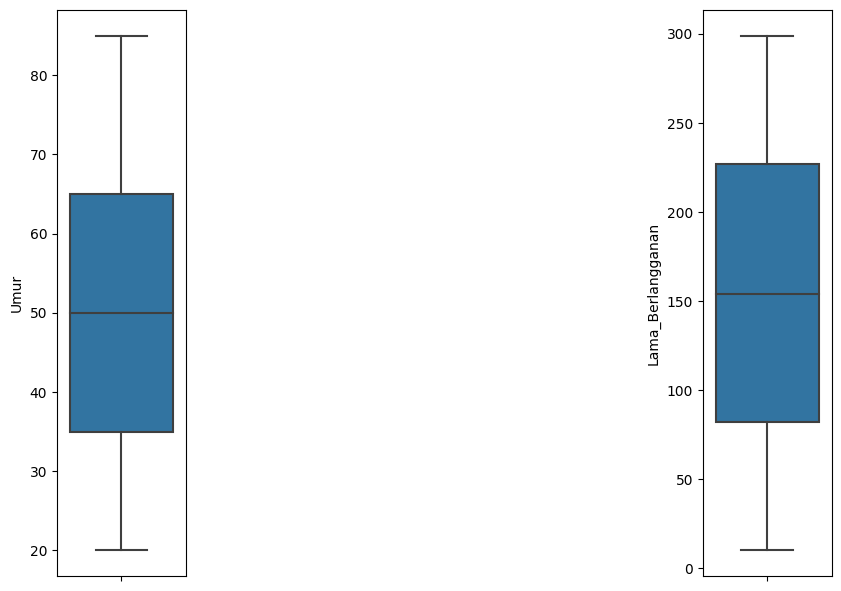

In [150]:
import seaborn as sns

selColumnLength = len(set(selColumn))
plt.figure(figsize=(10,7.5))
f, axes = plt.subplots(1, selColumnLength)
sns.boxplot(y=newData['Umur'], ax=axes[0])
sns.boxplot(y=newData['Lama_Berlangganan'], ax=axes[1])
plt.subplots_adjust(wspace=4)

Scatter Plot Outliers

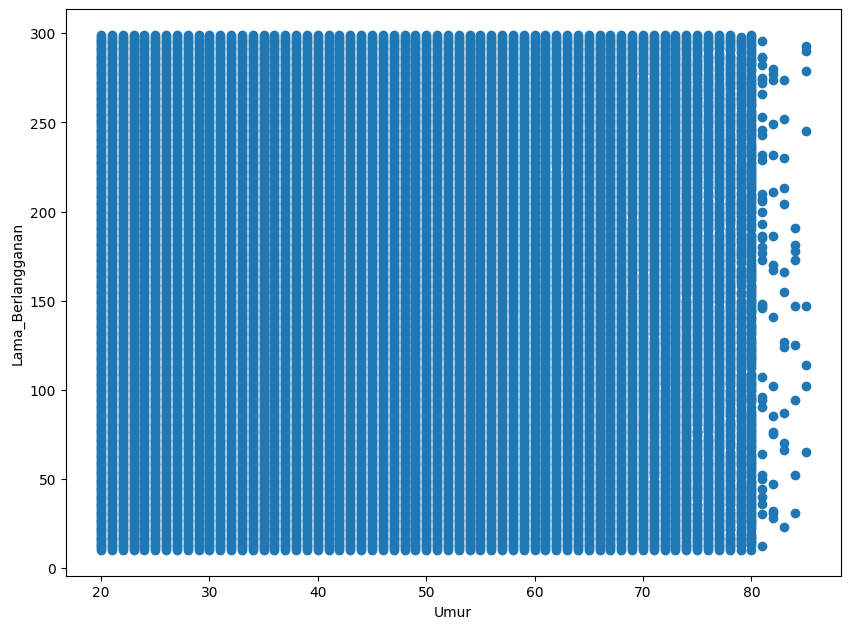

In [151]:
fig, ax = plt.subplots(figsize=(10,7.5))
ax.scatter(newData['Umur'], newData['Lama_Berlangganan'])
ax.set_xlabel('Umur')
ax.set_ylabel('Lama_Berlangganan')
plt.show()

Mencari Z-Score

In [152]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(newData))
print(z)

[[1.13276284 0.68693373]
 [0.11061096 0.0418791 ]
 [1.64383878 0.4240832 ]
 ...
 [1.99047902 1.65482554]
 [1.5361893  1.12900053]
 [1.64976173 0.36446839]]


In [153]:
z.shape

(17641, 2)

In [154]:
threshold = 3
print(np.where(z > -3))

(array([    0,     0,     1, ..., 17639, 17640, 17640]), array([0, 1, 0, ..., 1, 0, 1]))


In [155]:
print("Z-Score = ", z[9][1])

Z-Score =  1.511328578248353


**Hapus Outliers**

In [156]:
newDataO = newDataO[(z < -3).all(axis=1)]

In [157]:
newData.shape

(17641, 2)

In [158]:
newDataO.shape

(0, 2)

In [159]:
# IQR Score

newDataO1 = newData
Q1 = newDataO1.quantile(0.25)
Q3 = newDataO1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Umur                  30.0
Lama_Berlangganan    145.0
dtype: float64


In [160]:
newDataOut = newDataO1[~((newDataO1 < (Q1 - 1.5 * IQR)) |(newDataO1 > (Q3 + 1.5 * IQR))).any(axis=1)]
newDataOut.shape

(17641, 2)

# Scaling

In [161]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler().fit_transform(newDataOut)
scaling

array([[0.15384615, 0.30103806],
       [0.43076923, 0.51211073],
       [0.01538462, 0.37716263],
       ...,
       [1.        , 0.97923875],
       [0.87692308, 0.17301038],
       [0.90769231, 0.60553633]])

In [162]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaling)
data_new = pd.DataFrame(data = principalComponents, columns = ['x', 'y'])
data_new.head()

,x,y
0,-0.198738,-0.307023
1,0.012149,-0.029959
2,-0.122521,-0.445434
3,-0.316674,0.123667
4,0.136696,0.000894


In [163]:
newX = MinMaxScaler().fit_transform(data_new)
newX

array([[0.30136702, 0.15394683],
       [0.51212384, 0.43082967],
       [0.37753725, 0.01562703],
       ...,
       [0.97858208, 1.        ],
       [0.17293436, 0.87646401],
       [0.60517241, 0.90750264]])

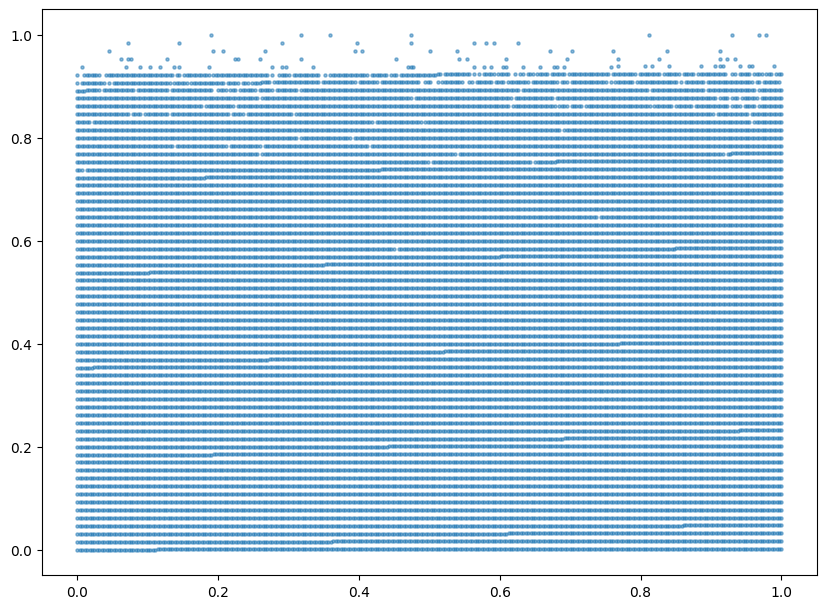

In [164]:
plt.figure(figsize=(10,7.5))
plt.scatter(newX[:,0], newX[:,1], s=5, cmap ='plasma', alpha=.5)
plt.show()

In [165]:
X = data_new.copy().values
X = MinMaxScaler(feature_range=(0,10)).fit_transform(X)

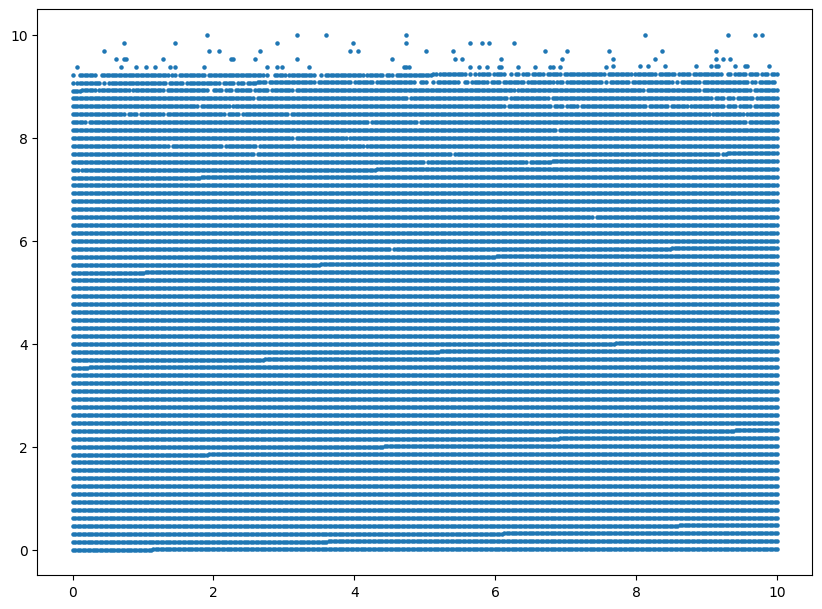

In [166]:
plt.figure(figsize=(10,7.5))
plt.scatter(X[:,0], X[:,1], s=5, cmap ='plasma')
plt.show()

# Clustering

Nilai K

In [167]:
K = 6

In [168]:
m=X.shape[0]
n=X.shape[1]
n_iter=50
import random

Membuat Array Kosong Untuk Centroid

In [169]:
centroids = np.array([]).reshape(n, 0)

Membuat Centroid Random Sejumlah K

In [170]:
for k in range(K):
  centroids = np.c_[centroids, X[random.randint(0, m-1)]]

In [171]:
output = {}

Membuat Array Kosong

In [172]:
euclid=np.array([]).reshape(m,0)

Mencari Jarak Antar Centroid

In [173]:
for k in range(K):
  dist=np.sum((X-centroids[:,k])**2,axis=1)
  euclid=np.c_[euclid,dist]  

Menyimpan Minimum Value

In [174]:
min=np.argmin(euclid,axis=1)+1

Mencari Mean Dari Cluster

In [175]:
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

Menetapkan Sebuah Cluster Ke Sebuah Titik

In [176]:
for k in range(m):
  cent[min[k]]=np.c_[cent[min[k]],X[k]]
for k in range(K):
  cent[k+1]=cent[k+1].T

Menghitung Ulang Mean

In [177]:
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

Mengulang Semua Step Diatas

In [178]:
for i in range(n_iter):
  euclid=np.array([]).reshape(m,0)
  for k in range(K):
    dist=np.sum((X-centroids[:,k])**2,axis=1)
    euclid=np.c_[euclid,dist]
  C=np.argmin(euclid,axis=1)+1
  cent={}
  for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)
  for k in range(m):
    cent[C[k]]=np.c_[cent[C[k]],X[k]]
  for k in range(K):
    cent[k+1]=cent[k+1].T
  for k in range(K):
    centroids[:,k]=np.mean(cent[k+1],axis=0)
  final=cent

Output Plottingan

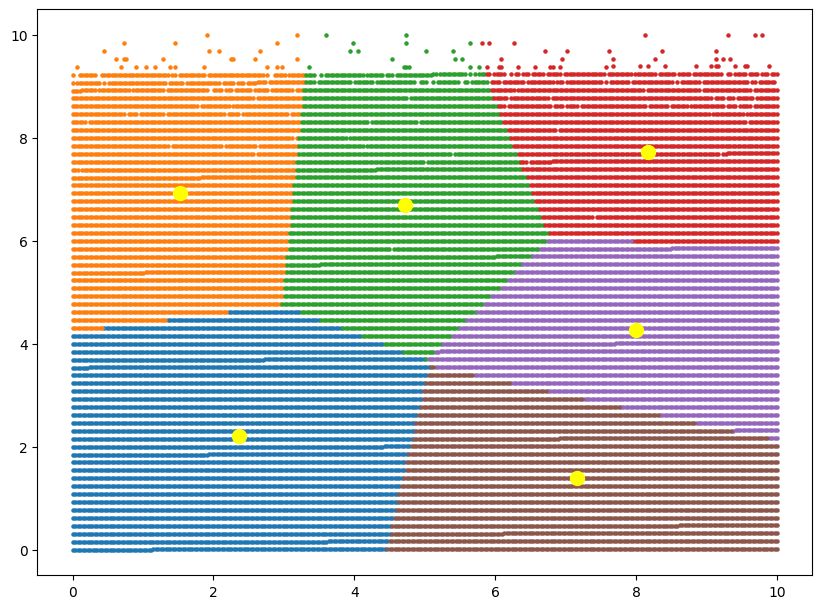

In [179]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1], s=5)
plt.scatter(centroids[0,:],centroids[1,:], s=100, c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

# Evaluasi Nilai Optimum K

Import Library

In [180]:
from sklearn.cluster import KMeans

Buat Array Kosong

In [181]:
elbow=[]

In [182]:
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

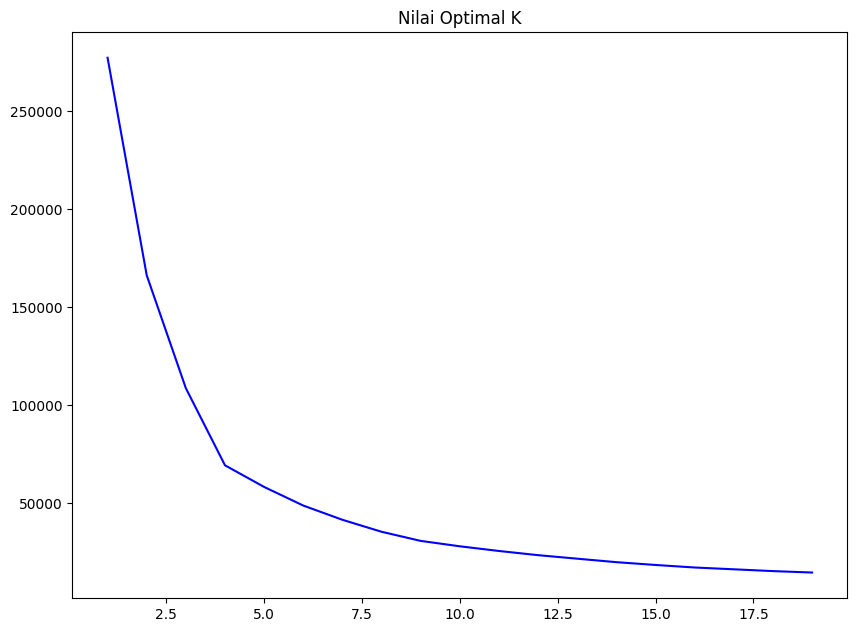

In [183]:
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Nilai Optimal K')
plt.show()